In [14]:
#Name:Nalawade prafulla Chandrashekhar.
#Roll No. : 42 B.E.A.I & D.S.
# CL IV (Business Intelligence)
# Practical No. 4

In [5]:
# import required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [4]:
# Load the Iris dataset 
iris = sns.load_dataset("iris") 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Encode target labels as numbers 
iris['species'] = iris['species'].astype('category').cat.codes  # 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2 
 
# Define features (X) and target (y) 
X = iris.drop(columns=['species']) 
y = iris['species'] 
 
# Split data into training (80%) and testing (20%) sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42, stratify=y)

In [7]:
# Standardizing the features 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [9]:
# Initialize and train the Random Forest model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
# 100 trees in the forest 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict on test data 
y_pred = rf_model.predict(X_test)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



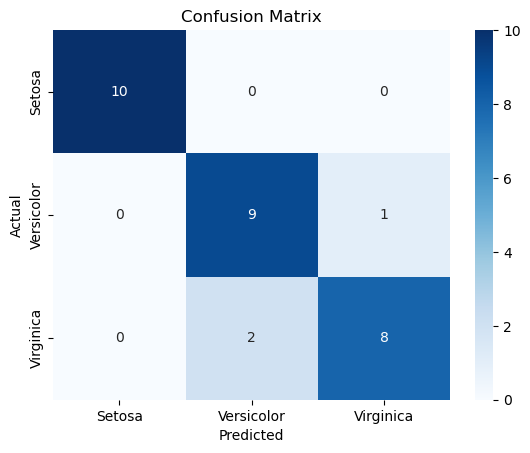

In [12]:
# Accuracy Score 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}") 
 
# Classification Report 
print("Classification Report:\n", classification_report(y_test, y_pred)) 
 
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 
'Versicolor', 'Virginica']) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()
